In [ ]:
%pip install torchvision==0.13
%pip install craft-text-detector

In [ ]:
!mkdir /root/.craft_text_detector/
!mkdir /root/.craft_text_detector/weights/

## weight 파일
!wget "https://drive.google.com/uc?export=download&id=12a2sTmAHX3NxPKfaAwvCqWfxu04HEi8H" -O /root/.craft_text_detector/weights/craft_mlt_25k.pth
!wget "https://drive.google.com/uc?export=download&id=1yGYZgmufEC22FSHWf7e9ZMdzn-KxaD5s" -O /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth

!ls -alt /root/.craft_text_detector/weights/

In [ ]:
# import Craft class
from craft_text_detector import Craft

# create a craft instance
output_dir = 'outputs/'
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=True)

In [ ]:
## 이미지 파일
!wget "https://drive.google.com/uc?export=download&id=1AAGLa_TMPTpMGRzN2o0EBW7QiBGiiA_L" -O test.jpg

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# export detected regions to output directory
craft.detect_text("test.jpg")

# load and reize image
detected = cv2.imread("/content/outputs/test_text_detection.png")
detected = cv2.resize(detected, dsize=(640,496))
link = cv2.imread("/content/outputs/test_link_score_heatmap.png")
link = cv2.resize(link, dsize=(0, 0), fx=.5, fy=.5)
text = cv2.imread("/content/outputs/test_text_score_heatmap.png")
text = cv2.resize(text, dsize=(0, 0), fx=.5, fy=.5)

# set up image layout
img = np.vstack((link, text))
img = np.hstack((detected, img))

# visualization using cv2
cv2_imshow(img)

TotalText Dataset의 test image 중 8개를 sampling 해보았다.



In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ssIfkF9AQikBmjLLp7c5SWYC7ltRAjXx" -O img_0.jpg
!wget "https://drive.google.com/uc?export=download&id=1FTQDfWubx-OLizf-iQU6sxJVIpfMJH8H" -O img_1.jpg
!wget "https://drive.google.com/uc?export=download&id=1A-i3f01Ade8y_ne9vmVUKx3Ies8Wvg_c" -O img_2.jpg
!wget "https://drive.google.com/uc?export=download&id=1obQJgdBe4l5KE_R4XEpFkd8ojUXf752t" -O img_3.jpg
!wget "https://drive.google.com/uc?export=download&id=1yHXCANzMT0QSK-C1VJgTsBctVlhNhYin" -O img_4.jpg
!wget "https://drive.google.com/uc?export=download&id=1Xru3tlqr_KJKZqPfsC05DnxkbDjYW5fw" -O img_5.jpg
!wget "https://drive.google.com/uc?export=download&id=1aRlizYUTPG1SaBSKYSQL6ABwq0KsjgoJ" -O img_6.jpg
!wget "https://drive.google.com/uc?export=download&id=1mezxlAGmoA9D5MfT1i1cG3gB_l3iL0yC" -O img_7.jpg

--2024-02-20 13:18:18--  https://drive.google.com/uc?export=download&id=1ssIfkF9AQikBmjLLp7c5SWYC7ltRAjXx
Resolving drive.google.com (drive.google.com)... 64.233.170.113, 64.233.170.100, 64.233.170.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.170.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ssIfkF9AQikBmjLLp7c5SWYC7ltRAjXx&export=download [following]
--2024-02-20 13:18:18--  https://drive.usercontent.google.com/download?id=1ssIfkF9AQikBmjLLp7c5SWYC7ltRAjXx&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.68.132, 2404:6800:4003:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62605 (61K) [image/jpeg]
Saving to: ‘img_0.jpg’

img_0.jpg           100%[===================>]  61.14K  --.-KB/s    in 0.001s  

2024-02

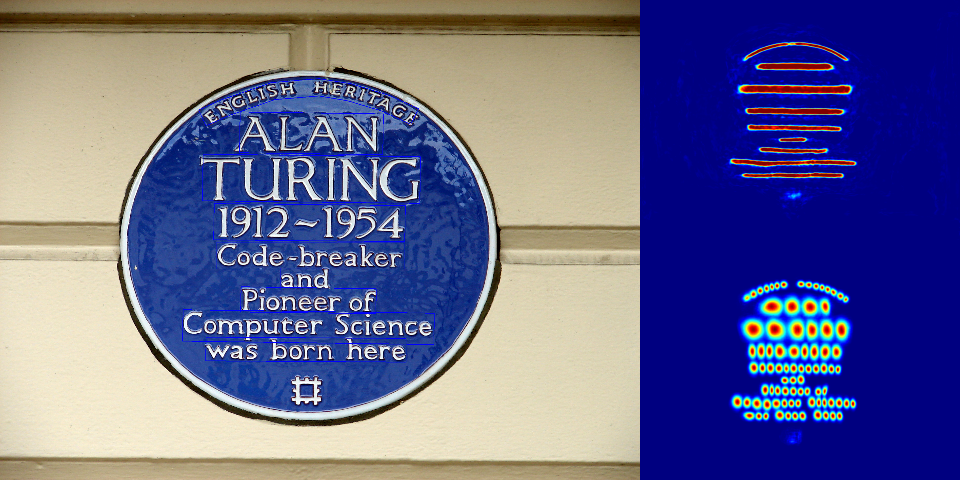

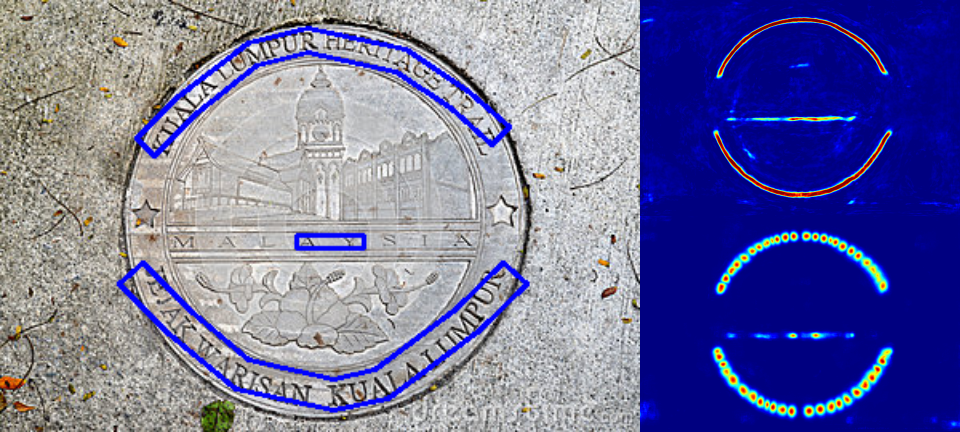

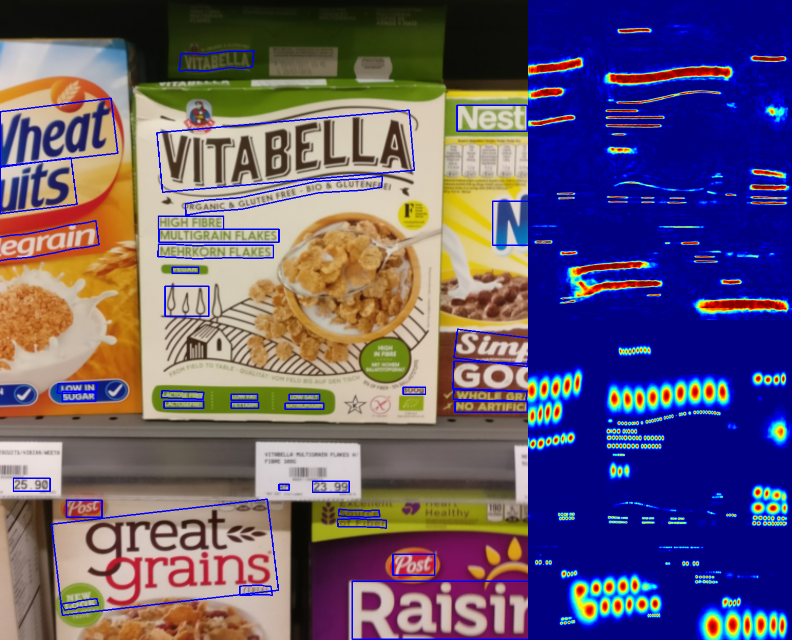

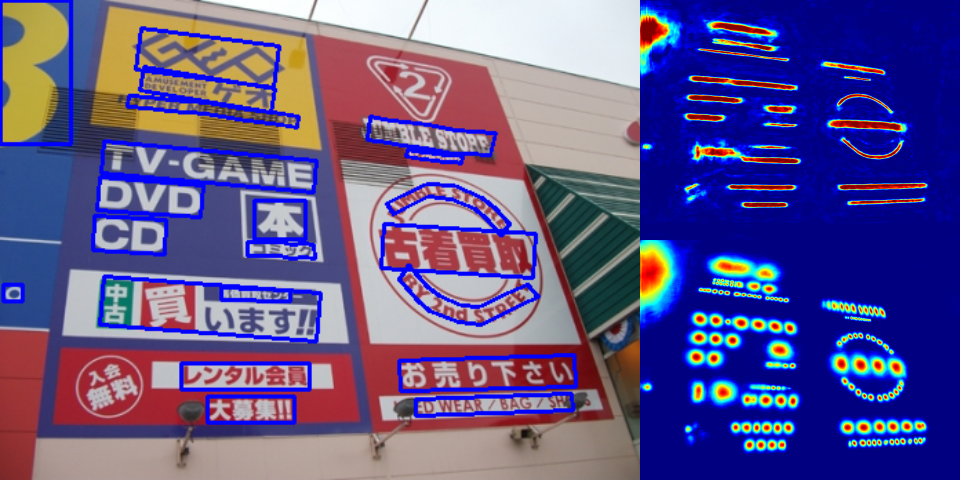

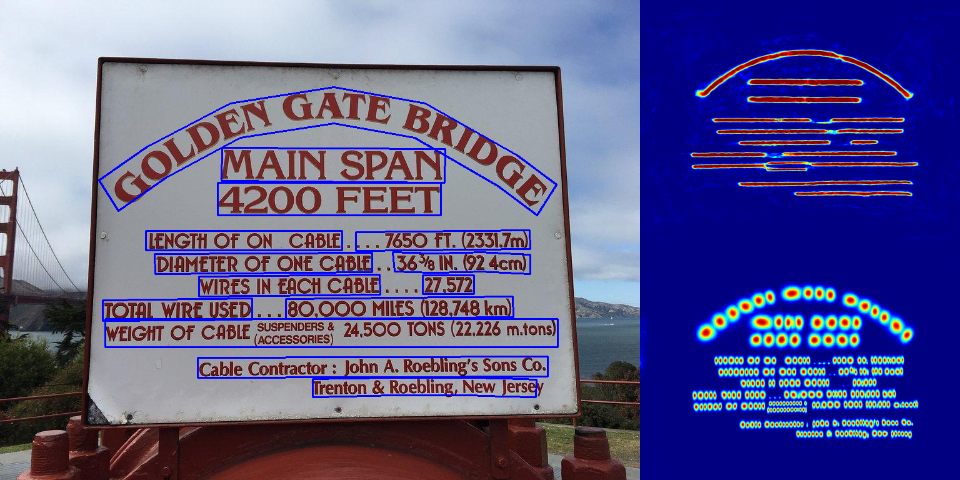

In [ ]:
# export detected regions to output directory
imgs = []
for idx in range(8):
  craft.detect_text(f"img_{idx}.jpg")

  # load image
  detected = cv2.imread(f"/content/outputs/img_{idx}_text_detection.png")
  link = cv2.imread(f"/content/outputs/img_{idx}_link_score_heatmap.png")
  text = cv2.imread(f"/content/outputs/img_{idx}_text_score_heatmap.png")

  # resize image & set up layout
  link = cv2.resize(link, dsize=(0, 0), fx=.5, fy=.5)
  text = cv2.resize(text, dsize=(0, 0), fx=.5, fy=.5)
  img = np.vstack((link, text))

  detected = cv2.resize(detected, dsize=(img.shape[1]*2, img.shape[0]))
  img = np.hstack((detected, img))

  imgs.append(img)
  cv2_imshow(img)

Saving 진료비_예시.png to 진료비_예시.png


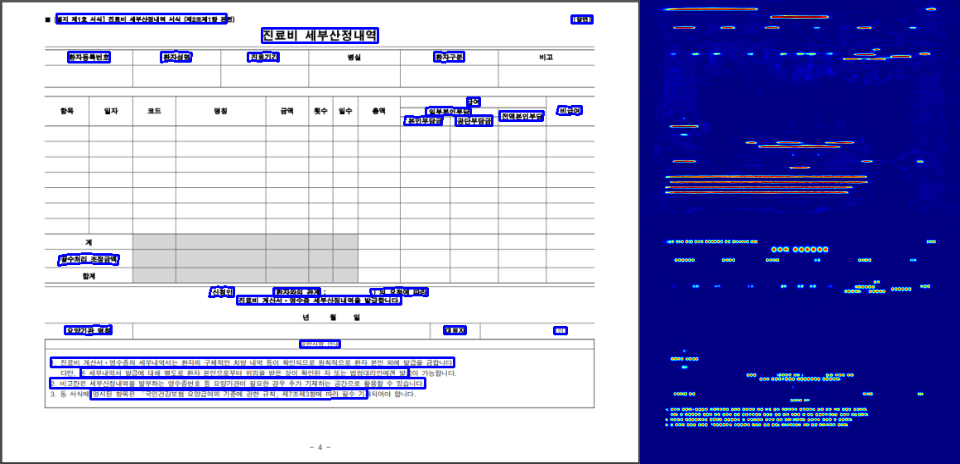

In [ ]:
from google.colab import files

# set up upload UI
uploaded = files.upload()
fname = list(uploaded.keys())[0]

# test
prediction_result = craft.detect_text(fname)

iname = ".".join(fname.split(".")[:-1])

detected = cv2.imread(f"/content/outputs/{iname}_text_detection.png")
link = cv2.imread(f"/content/outputs/{iname}_link_score_heatmap.png")
text = cv2.imread(f"/content/outputs/{iname}_text_score_heatmap.png")

link = cv2.resize(link, dsize=(0, 0), fx=.5, fy=.5)
text = cv2.resize(text, dsize=(0, 0), fx=.5, fy=.5)
img = np.vstack((link, text))

detected = cv2.resize(detected, dsize=(img.shape[1]*2, img.shape[0]))
img = np.hstack((detected, img))

cv2_imshow(img)